```{contents}
```

# K-Means from scratch

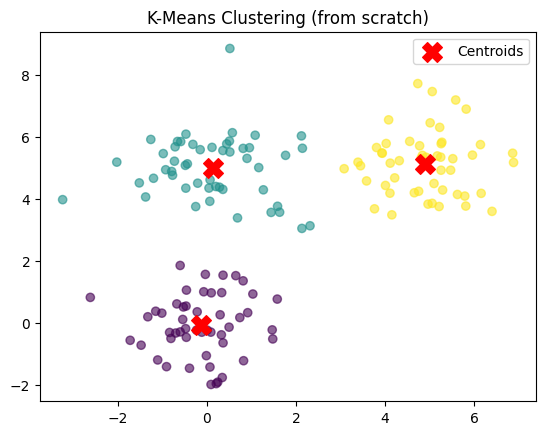

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# K-Means from Scratch
# -----------------------------

class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol   # tolerance for convergence

    def fit(self, X):
        n_samples, n_features = X.shape

        # Step 1: Initialize centroids randomly
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            # Step 2: Assign clusters
            distances = self._compute_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # Step 3: Recompute centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            # Step 4: Check for convergence
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

# -----------------------------
# Demonstration
# -----------------------------

# Generate synthetic data
np.random.seed(42)
X1 = np.random.randn(50, 2) + np.array([0, 0])
X2 = np.random.randn(50, 2) + np.array([5, 5])
X3 = np.random.randn(50, 2) + np.array([0, 5])
X = np.vstack([X1, X2, X3])

# Apply K-Means from scratch
kmeans = KMeansScratch(k=3, max_iters=100)
kmeans.fit(X)
labels = kmeans.labels
centroids = kmeans.centroids

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering (from scratch)")
plt.legend()
plt.show()
